# Data Preprocessing

Il dataset, prima di tutto, va opportunamente elaborato per occuparsi di eventuali dati duplicati o mancanti. Inoltre dovremo separare i dati per ottenere un training e un test set.
Gli step che seguiremo saranno i seguenti:
1. Caricare i dati
2. Gestire i dati mancanti
3. Eliminare le features ridondanti
4. Dividere il dataset in training e test set
5. Normalizzare e standardizzare i dati

### Definizione variabili

Per facilità d'utilizzo si esplicitano qui i `valori delle variabili` del modello.

In [38]:
# Lunghezza percentuale del dataset di allenamento, il test è definito di conseguenza
len_percentage_training = 80 / 100

numero_di_features = 2
output_CNN_1 = 20
kernel_size_1 = 2

### Librerie

Allo stesso modo si inseriscono qui tutte le `librerie usate` per il progetto

In [39]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Caricamento dei dati

Tramite `pandas` e il dataset fornito in .csv, carichiamo i dati all'interno di un dataset.

In [40]:
# IN_COLAB = 'google.colab' in sys.modules

# if True:
#     import kaggle
#     kaggle.api.authenticate()
#     kaggle.api.dataset_download_files('facial-expression-recognitionferchallenge', path='fer2013/fer2013/fer2013.csv', unzip=True)

# else:
#     fer2013 = pd.read_csv('files/fer2013.csv')

fer2013 = pd.read_csv('files/fer2013.csv')
fer2013

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


### Eliminazione della colonna "Usage"

In [41]:
print(list(fer2013.columns))
fer2013 = fer2013.drop(['Usage'], axis=1)
print(list(fer2013.columns))

['emotion', 'pixels', 'Usage']
['emotion', 'pixels']


### Divisione del data set in training e test set

Si vuole dividere il data set in 2 parti:
1. Training set
2. Test set

In [42]:
training_set, test_set = np.split(fer2013, [ int(len_percentage_training * len(fer2013)) ] )

print("Lunghezza percentuale di:")
print("training_set {:.0%}".format( len(training_set) / len(fer2013) ))
print("test_set {:.0%}".format( len(test_set) / len(fer2013) ))

Lunghezza percentuale di:
training_set 80%
test_set 20%


### Mostrare le immagini

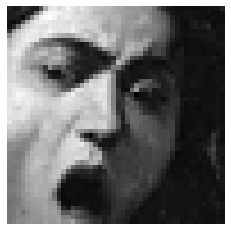

In [31]:
def show(img):

    img = img.split(" ")
    img = np.array([float(item) for item in img])
    showImg = img.reshape(48,48)
    
    plt.axis("off")
    plt.imshow(showImg, cmap = 'gray')

# show(test_set.pixels.values[0])

### Normalizzazione dei dati

# Modello con CNN

### VGG16 Schema

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16.jpg" alt="drawing" width="500"/>

### Definizione del modello

In [ ]:
import torch

class Emotion_CNN(torch.nn.Module):
    def __init__(self):
        super(Emotion_CNN, self).__init__()
    
        self.l_cnn_1 = torch.nn.Conv2d()
        self.l_norm_1 = torch.nn.BatchNorm2d()
        self.l_relu_1 = torch.nn.ReLU()
        self.l_pool_1 = torch.nn.MaxPool2d()

        self.l_cnn_2 = torch.nn.Conv2d()
        self.l_norm_2 = torch.nn.BatchNorm2d()
        self.l_relu_2 = torch.nn.ReLU()
        self.l_pool_2 = torch.nn.MaxPool2d()

        self.l_linear = torch.nn.Linear()

    def forward(self, x):        
        batch_size, seq_len, _ = x.size()
        lstm_out, self.hidden = self.l_lstm(x)
        x = lstm_out.contiguous().view(batch_size,-1)
        return self.l_linear(x)

[Sito da cui ho preso il modello successivo](https://www.analyticsvidhya.com/blog/2019/10/building-image-classification-models-cnn-pytorch/)

In [ ]:
# class Net(Module):   
#     def __init__(self):
#         super(Net, self).__init__()
#
#         self.cnn_layers = Sequential(
#             # Defining a 2D convolution layer
#             Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
#             BatchNorm2d(4),
#             ReLU(inplace=True),
#             MaxPool2d(kernel_size=2, stride=2),
#             # Defining another 2D convolution layer
#             Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
#             BatchNorm2d(4),
#             ReLU(inplace=True),
#             MaxPool2d(kernel_size=2, stride=2),
#         )
# 
#         self.linear_layers = Sequential(
#             Linear(4 * 7 * 7, 10)
#         )
# 
#     # Defining the forward pass    
#     def forward(self, x):
#         x = self.cnn_layers(x)
#         x = x.view(x.size(0), -1)
#         x = self.linear_layers(x)
#         return x

### Istanza del modello

Qua Lunni dobbiamo fare attenzione a `impostare il device in base all'ambiente` (Colab o locale)

In [ ]:
import torch

#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model = Emotion_CNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
criterion = torch.nn.MSELoss()
device

### Divisione in Tensori

### Creazione dei DataLoader

### Definizione di Training e Validation

### Allenamento e Validazione del modello

### Visualizzazione grafico della loss

### Salva stato del modello

### Carica stato del modello

# Predizione e valutazione del modello

### Classificazione di Test

### Valutazione del modello